In [1]:
# Perform hierarchical clustering on the Play data
# and and the data generated with the help of two
# equations of concentric circles, adding some random
# noise. Apply various distance measures, including
# single, multiple, and average linkages, and ward.

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_circles
from sklearn.metrics import adjusted_rand_score
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt



In [2]:
dataset = pd.read_excel("play.xlsx")
dataset.head()

,Outlook,Temperature,Humidity,Windy,Decision
0,overcast,72,90,strong,play
1,overcast,83,78,weak,play
2,overcast,64,65,strong,play
3,overcast,81,75,weak,play
4,sunny,75,70,strong,play


In [3]:
# one hot encoding
onehot_encoder = OneHotEncoder(handle_unknown='ignore')

# label encoder
label_encoder = LabelEncoder()

In [4]:
# outlook
print('Outlook: ', dataset['Outlook'].nunique())
dataset['Outlook'] = label_encoder.fit_transform(dataset['Outlook'])

# Windy
print('Windy: ', dataset['Windy'].nunique())
dataset['Windy'] = label_encoder.fit_transform(dataset['Windy'])

# Decision
print('Decision: ', dataset['Decision'].nunique())
dataset['Decision'] = label_encoder.fit_transform(dataset['Decision'])

dataset.describe()

Outlook:  3
Windy:  2
Decision:  2


,Outlook,Temperature,Humidity,Windy,Decision
count,14.000000,14.000000,14.000000,14.000000,14.000000
mean,1.071429,73.571429,80.285714,0.571429,0.642857
std,0.828742,6.571667,9.840486,0.513553,0.497245
min,0.000000,64.000000,65.000000,0.000000,0.000000
25%,0.250000,69.250000,71.250000,0.000000,0.000000
50%,1.000000,72.000000,80.000000,1.000000,1.000000
75%,2.000000,78.750000,88.750000,1.000000,1.000000
max,2.000000,85.000000,96.000000,1.000000,1.000000


AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Outlook      14 non-null     int32
 1   Temperature  14 non-null     int64
 2   Humidity     14 non-null     int64
 3   Windy        14 non-null     int32
 4   Decision     14 non-null     int32
dtypes: int32(3), int64(2)
memory usage: 520.0 bytes
None


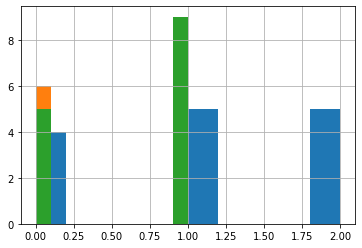

In [5]:
print(dataset['Outlook'].hist())
print(dataset['Windy'].hist())
print(dataset['Decision'].hist())

print(dataset.info())

In [6]:
print("Outlook \n", dataset['Outlook'].value_counts(normalize=True), '\n')
print("Windy \n", dataset['Windy'].value_counts(normalize=True), '\n')
print("Decision \n", dataset['Decision'].value_counts(normalize=True), '\n')

Outlook 
 2    0.357143
1    0.357143
0    0.285714
Name: Outlook, dtype: float64 

Windy 
 1    0.571429
0    0.428571
Name: Windy, dtype: float64 

Decision 
 1    0.642857
0    0.357143
Name: Decision, dtype: float64 



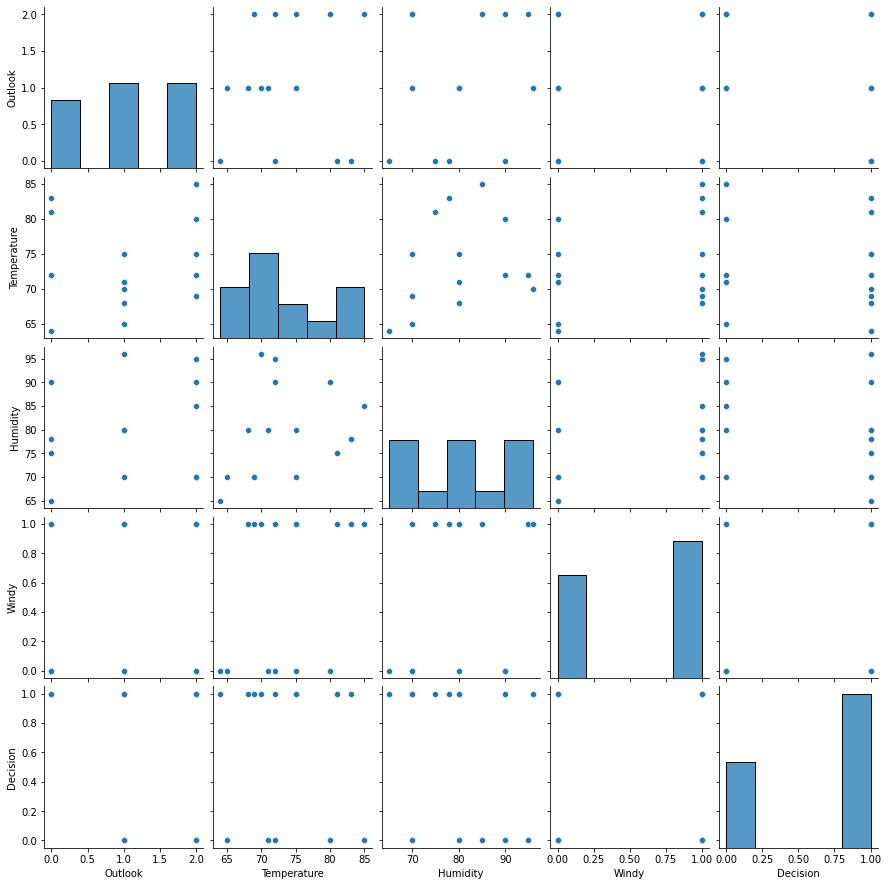

In [7]:
sns.pairplot(dataset)

Method: Ward
Metric: Euclidean


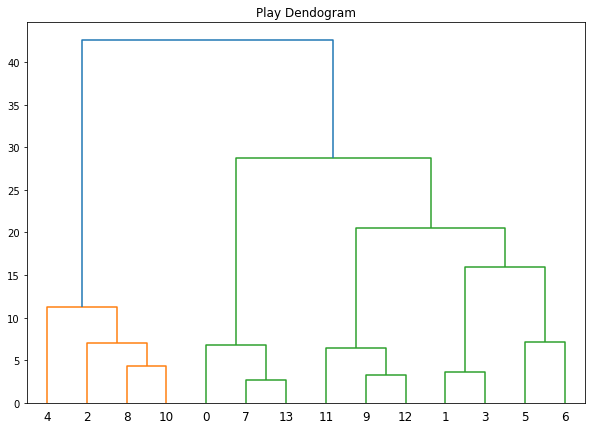

[0 0 1 0 1 0 0 0 1 0 1 0 0 0]


-0.07835550181378477

In [41]:
# displaying dendograms to justify hierarchical clustering

# linkage{‘ward’, ‘complete’, ‘average’, ‘single’}, default=’ward’
print("Method: Ward")
print("Metric: Euclidean")

plt.figure(figsize=(10, 7))
plt.title("Play Dendogram")

# Selecting Play data
clusters = shc.linkage(dataset,method='ward',metric="euclidean")
shc.dendrogram(Z=clusters)
plt.show()

clustering_model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
Y_predictions = clustering_model.fit_predict(dataset)
print(Y_predictions)

adjusted_rand_score(dataset.Decision, Y_predictions)


Method: Complete
Metric: Euclidean


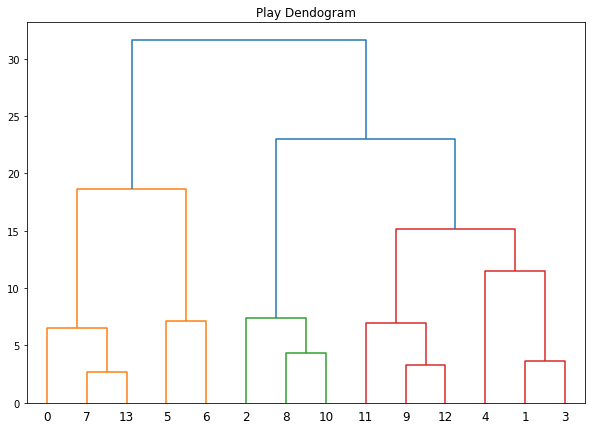

[1 0 0 0 0 1 1 1 0 0 0 0 0 1]


0.12077294685990338

In [42]:
print("Method: Complete")
print("Metric: Euclidean")

plt.figure(figsize=(10, 7))
plt.title("Play Dendogram")

# Selecting Play data
clusters = shc.linkage(dataset,method='complete',metric="euclidean")
shc.dendrogram(Z=clusters)
plt.show()

clustering_model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')
Y_predictions = clustering_model.fit_predict(dataset)
print(Y_predictions)

adjusted_rand_score(dataset.Decision, Y_predictions)

Method: Average
Metric: Euclidean


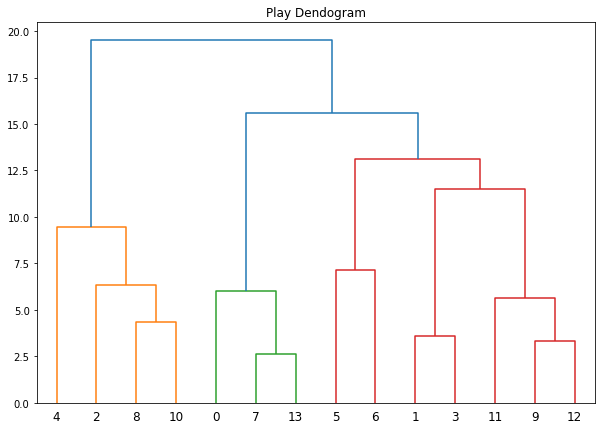

[0 0 1 0 1 0 0 0 1 0 1 0 0 0]


-0.07835550181378477

In [43]:
print("Method: Average")
print("Metric: Euclidean")

plt.figure(figsize=(10, 7))
plt.title("Play Dendogram")

# Selecting Play data
clusters = shc.linkage(dataset,method='average',metric="euclidean")
shc.dendrogram(Z=clusters)
plt.show()

clustering_model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='average')
Y_predictions = clustering_model.fit_predict(dataset)
print(Y_predictions)

adjusted_rand_score(dataset.Decision, Y_predictions)

Method: Single
Metric: Euclidean


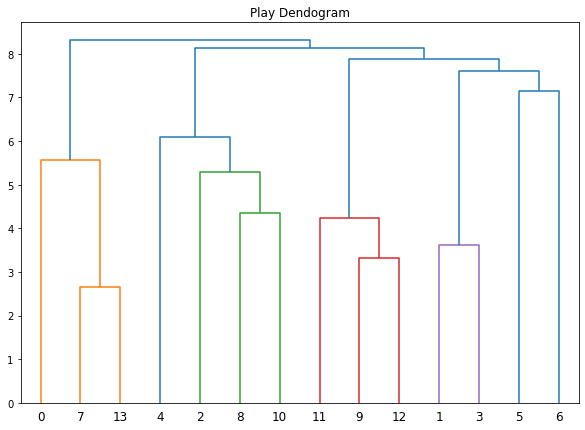

[1 0 0 0 0 0 0 1 0 0 0 0 0 1]


-0.05813953488372093

In [44]:
print("Method: Single")
print("Metric: Euclidean")

plt.figure(figsize=(10, 7))
plt.title("Play Dendogram")

# Selecting Play data
clusters = shc.linkage(dataset,method='single',metric="euclidean")
shc.dendrogram(Z=clusters)
plt.show()

clustering_model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='single')
Y_predictions = clustering_model.fit_predict(dataset)
print(Y_predictions)

adjusted_rand_score(dataset.Decision, Y_predictions)

Method: Average
Metric: Cosine


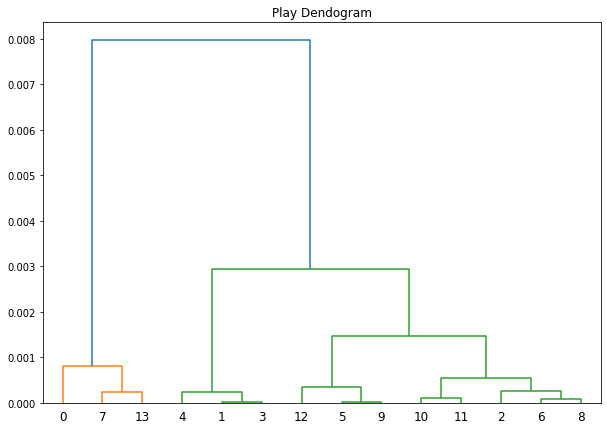

[1 0 0 0 0 0 0 1 0 0 0 0 0 1]


-0.05813953488372093

In [45]:
# we shall try multiple combinations of distance metrics
# “euclidean”, “l1”, “l2”, “manhattan”, “cosine”, or “precomputed”

print("Method: Average")
print("Metric: Cosine")

plt.figure(figsize=(10, 7))
plt.title("Play Dendogram")

# Selecting Play data
clusters = shc.linkage(dataset,method='average',metric="cosine")
shc.dendrogram(Z=clusters)
plt.show()

clustering_model = AgglomerativeClustering(n_clusters=2, affinity='cosine', linkage='average')
Y_predictions = clustering_model.fit_predict(dataset)
print(Y_predictions)

adjusted_rand_score(dataset.Decision, Y_predictions)

Method: Single
Metric: Cosine


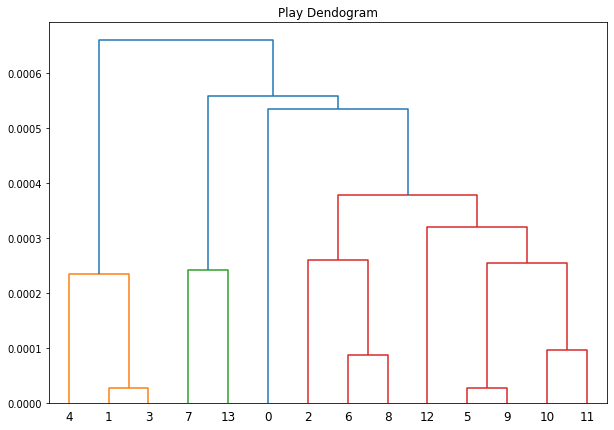

[0 1 0 1 1 0 0 0 0 0 0 0 0 0]


-0.05813953488372093

In [46]:
print("Method: Single")
print("Metric: Cosine")

plt.figure(figsize=(10, 7))
plt.title("Play Dendogram")

# Selecting Play data
clusters = shc.linkage(dataset,method='single',metric="cosine")
shc.dendrogram(Z=clusters)
plt.show()

clustering_model = AgglomerativeClustering(n_clusters=2, affinity='cosine', linkage='single')
Y_predictions = clustering_model.fit_predict(dataset)
print(Y_predictions)
adjusted_rand_score(dataset.Decision, Y_predictions)

Method: Complete
Metric: Cosine


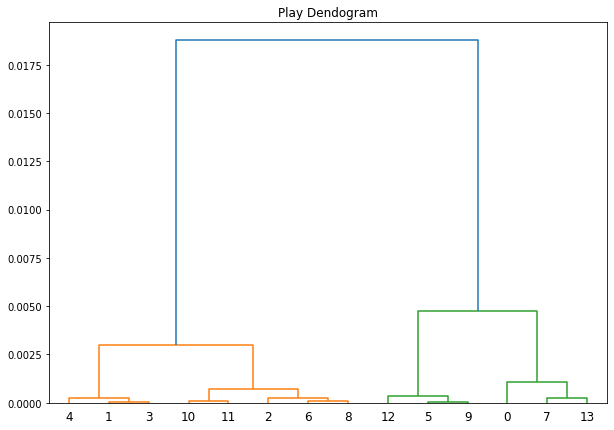

[0 1 1 1 1 0 1 0 1 0 1 1 0 0]


0.011585807385952208

In [47]:

print("Method: Complete")
print("Metric: Cosine")

plt.figure(figsize=(10, 7))
plt.title("Play Dendogram")

# Selecting Play data
clusters = shc.linkage(dataset,method='complete',metric="cosine")
shc.dendrogram(Z=clusters)
plt.show()

clustering_model = AgglomerativeClustering(n_clusters=2, affinity='cosine', linkage='complete')
Y_predictions = clustering_model.fit_predict(dataset)
print(Y_predictions)

adjusted_rand_score(dataset.Decision, Y_predictions)

In [48]:
# 0 indicates that the sample is on or very close to the
# decision boundary between two neighbouring clusters.

# Negative values, instead, indicate that those samples
# might have been assigned to the wrong cluster.